The dataset provides information about a marketing campaign of a financial institution in which we will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [54]:
import pandas as pd

In [55]:
# Load bank-additional-full.csv
bank_additional_full_path = '/Users/admin/Desktop/python/hackathon3/bank+marketing/bank-additional/bank-additional-full.csv'
bank_additional_full = pd.read_csv(bank_additional_full_path, sep=';')

# Load bank-full.csv
bank_full_path = '/Users/admin/Desktop/python/hackathon3/bank+marketing/bank/bank-full.csv'
bank_full = pd.read_csv(bank_full_path, sep=';')

In [56]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [58]:
bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In 'bank_full' dataset we can see these data about clients and current and previous compain:
  # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [59]:
bank_additional_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In bank_additional_full dataset we have 5 additional columns that represent social and economic context attributes.

emp.var.rate: Employment Variation Rate - This is a quarterly indicator representing the rate of change in employment. It measures the percentage change in the number of employed individuals over a quarter.

cons.price.idx: Consumer Price Index - This is a monthly indicator that measures the changes in the general price level of goods and services that households acquire for consumption. It provides insight into inflation or deflation.

cons.conf.idx: Consumer Confidence Index - This is a monthly indicator reflecting the degree of optimism or pessimism consumers feel about the overall state of the economy. It is based on consumers' expectations about their own financial situation and the economic climate.

euribor3m: Euribor 3 Month Rate - This is a daily indicator representing the average interest rate at which a selection of European banks lend one another funds denominated in euros, with a three-month maturity. It's often used as a reference for variable-rate mortgages.

nr.employed: Number of Employees - This is a quarterly indicator representing the total number of employees in the economy. It provides information about the overall employment level.

These economic indicators are often used in financial and economic analyses to understand the macroeconomic environment and its potential impact on various aspects, including banking and financial services.


What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. 

Data Cleaning:

In [60]:
missing_values = bank_full.isnull().sum()
duplicated_rows = bank_full.duplicated().sum()

print("Missing Values:")
print(missing_values[missing_values > 0])

print("\nNumber of Duplicated Rows:", duplicated_rows)

Missing Values:
Series([], dtype: int64)

Number of Duplicated Rows: 0


No duplicates or missing data detected.

In [61]:
bank_full.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [62]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Exploring the Basics about bank client data

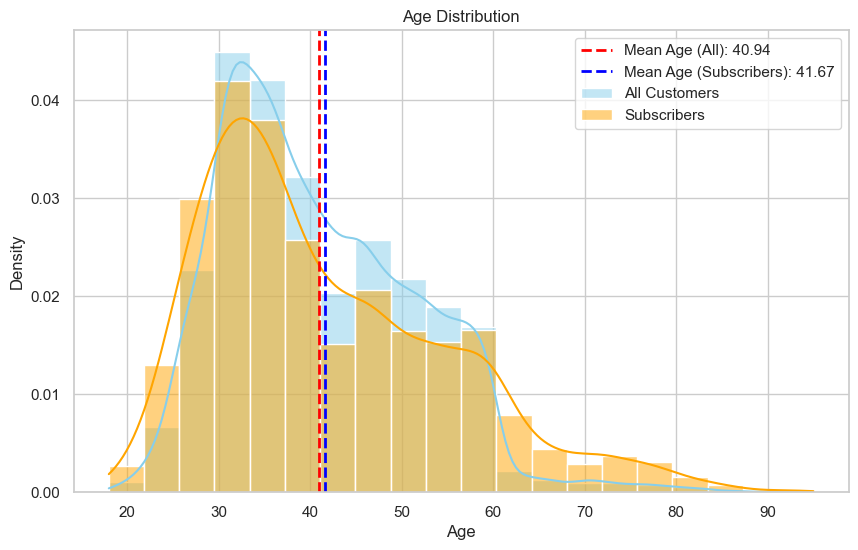

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting the overall age distribution
sns.histplot(bank_full['age'], bins=20, kde=True, color='skyblue', stat='density', label='All Customers')

# Plotting the age distribution of subscribers
subscribers_age = bank_full[bank_full['y'] == 'yes']['age']
sns.histplot(subscribers_age, bins=20, kde=True, color='orange', stat='density', label='Subscribers')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')

mean_age_all = bank_full['age'].mean()
mean_age_subscribers = subscribers_age.mean()

plt.axvline(mean_age_all, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age (All): {mean_age_all:.2f}')
plt.axvline(mean_age_subscribers, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Age (Subscribers): {mean_age_subscribers:.2f}')

plt.legend()
plt.show()


Mean Age is aproximately 41 years old (both subscribers or not). (Minimum: 18 years old and Maximum: 95 years old.)


Let's explore an average yearly balance, and its standart deviation.

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_31494/2204659945.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




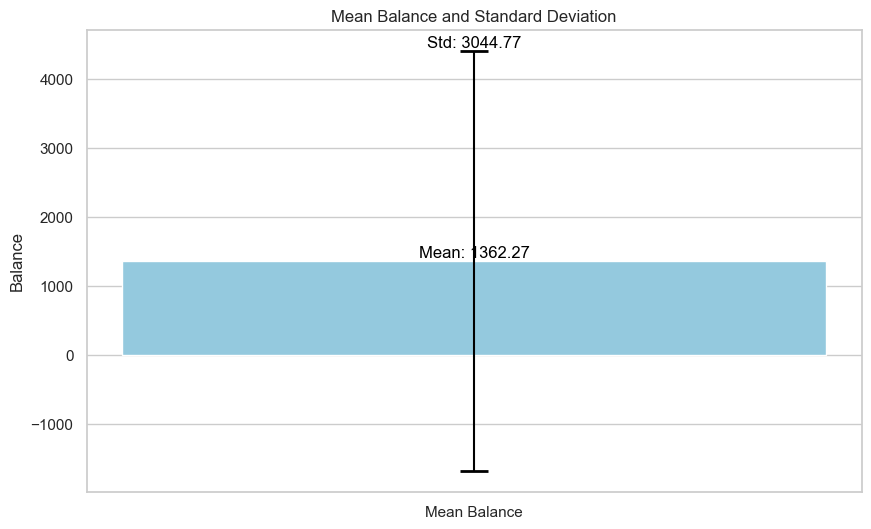

In [64]:
mean_balance = bank_full['balance'].mean()
std_balance = bank_full['balance'].std()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Mean Balance'], y=[mean_balance], color='skyblue', ci='sd')

# Add error bars to show standard deviation
plt.errorbar(x=['Mean Balance'], y=[mean_balance],
             yerr=[std_balance], fmt='none', color='black', capsize=10, capthick=2)

plt.title('Mean Balance and Standard Deviation')
plt.ylabel('Balance')

# Print mean and standard deviation on the plot
plt.text(0, mean_balance, f'Mean: {mean_balance:.2f}', ha='center', va='bottom', color='black', fontsize=12)
plt.text(0, mean_balance + std_balance, f'Std: {std_balance:.2f}', ha='center', va='bottom', color='black', fontsize=12)

plt.show()


The mean balance is 1,362 euros. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.


Analysis of Education and Total number of subscribers :

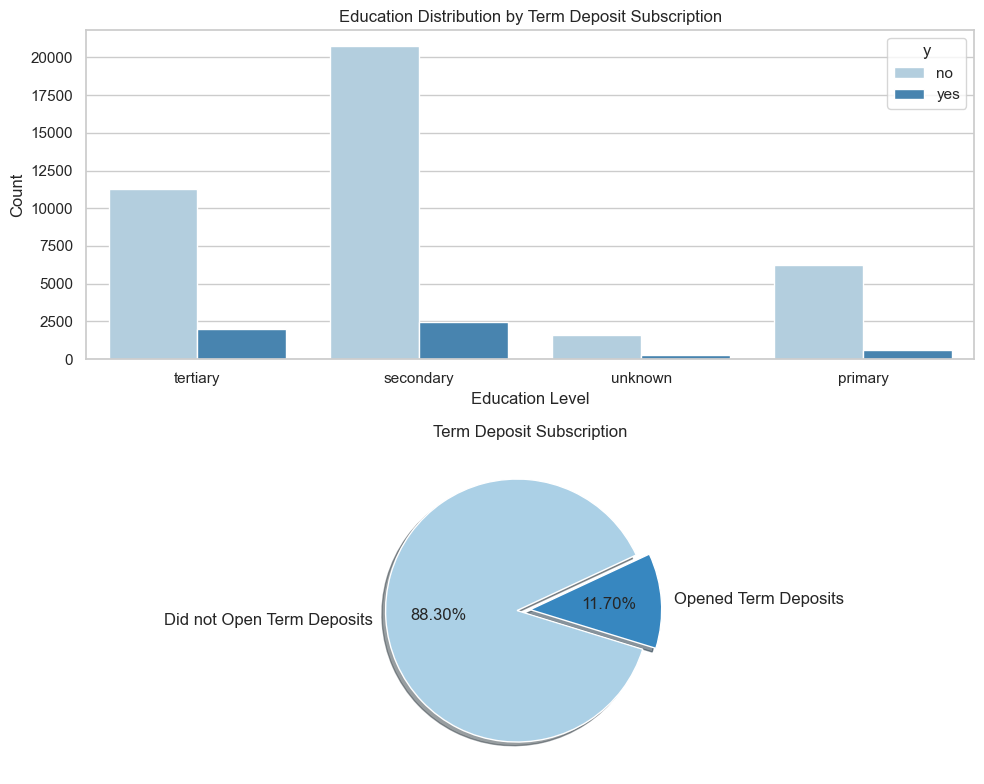

In [65]:
plt.figure(figsize=(10, 8))

# Subplot 1: Percentage count of clients who opened a term deposit or not
plt.subplot(2, 1, 2)
colors = sns.color_palette("Blues", 2)
labels = "Did not Open Term Deposits", "Opened Term Deposits"

bank_full["y"].value_counts().plot.pie(explode=[0.1, 0], autopct='%1.2f%%', shadow=True, colors=colors,
                                       labels=labels, fontsize=12, startangle=25)
plt.title('Term Deposit Subscription')
plt.ylabel('')

# Subplot 2: Analysis of education among those who subscribed and those who didn't
plt.subplot(2, 1, 1)
sns.countplot(x="education", hue="y", data=bank_full, palette=colors)

plt.title('Education Distribution by Term Deposit Subscription')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


We can observe that 11.7% of all clients subscribed to deposit. 
Most clients are with secondary education level , most clients who subscribed the deposits are with secondary level , followed by tertiary level.

Analysis by Occupation:

1. Countplot for Job Distribution:

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_31494/2302149495.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




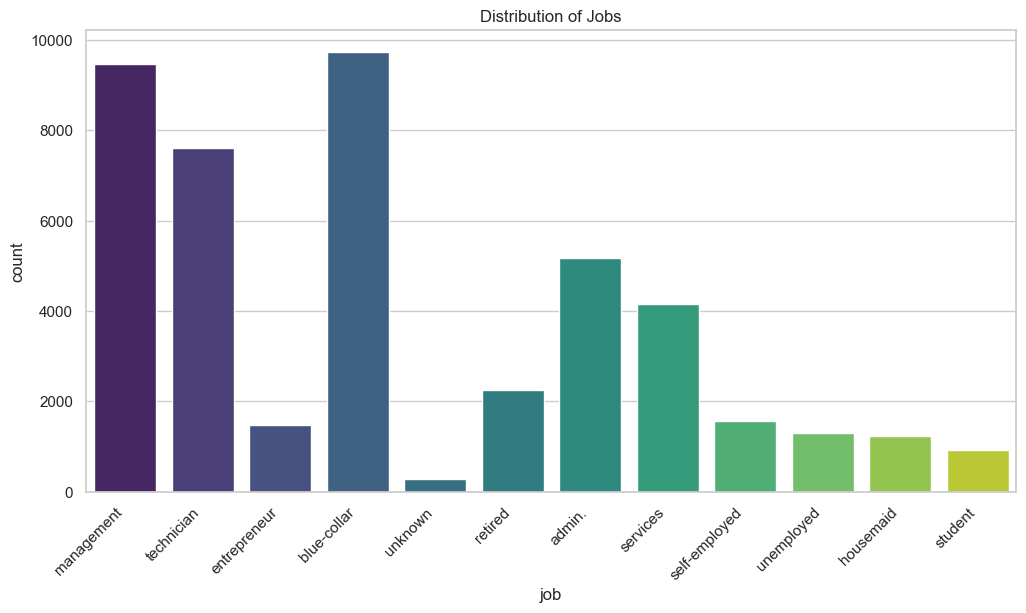

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=bank_full, palette='viridis')
plt.title('Distribution of Jobs')
plt.xticks(rotation=45, ha='right')
plt.show()


Blue-collar (workers) and Management are the occupations that is more prevalent in this dataset.

2. Cross Tabulation with Target Variable:
Create a cross-tabulation (crosstab) to analyze how the job categories relate to the target variable ('y').

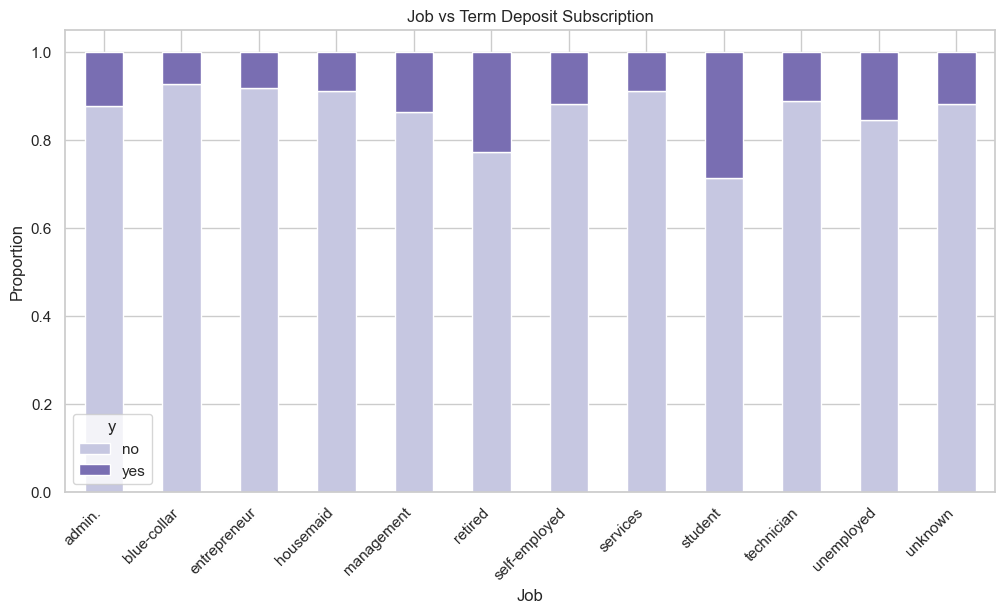

In [67]:
job_cross_tab = pd.crosstab(bank_full['job'], bank_full['y'], normalize='index')
colors = sns.color_palette("Purples", 2)
job_cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))
plt.title('Job vs Term Deposit Subscription')
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.show()


The insigts of analysis by occupations are show that the largest number of subscriptions were made by retired and students, followed by unemployed.

3. Statistical Analysis:

In [68]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(bank_full['job'], bank_full['y'])

# Performing the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")


Chi-squared: 836.1054877471965
P-value: 3.337121944935502e-172


Chi-squared Value (836.1054877471965):

The chi-squared value is a measure of how much the observed distribution of data deviates from the expected distribution if there were no association between job categories and term deposit subscription.
In this case, a higher chi-squared value indicates a larger deviation from independence.

P-value (3.337121944935502e-172):

The p-value associated with the chi-squared test is extremely small (close to zero), indicating strong evidence against the null hypothesis (the hypothesis that there is no association between job categories and term deposit subscription).
A small p-value suggests that we can reject the null hypothesis in favor of the alternative hypothesis, indicating a significant association.

Conclusion:
With such a small p-value, we have strong evidence to suggest that there is a significant association between the 'job' category and the likelihood of subscribing to a term deposit.
In other words, the type of job a person has appears to be related to whether they subscribe to a term deposit.

Further exploration and analysis can be performed to understand the nature and strength of this association in more detail.

Now let's check the Distribution of Ages by Occupation for Subscribed Clients

In [69]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [70]:
subscribed_df = bank_full[bank_full["y"] == "yes"]

occupations = subscribed_df["job"].unique().tolist()

ages_by_job = [subscribed_df["age"].loc[subscribed_df["job"] == job].values for job in occupations]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)',
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
          'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
          'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages_by_job, colors):
    traces.append(go.Box(
        y=yd,
        name=xd,
        boxpoints='all',
        jitter=0.5,
        whiskerwidth=0.2,
        fillcolor=cls,
        marker=dict(
            size=2,
        ),
        line=dict(width=1),
    ))

layout = go.Layout(
    title='Distribution of Ages by Occupation for Subscribed Clients',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224, 255, 246)',
    plot_bgcolor='rgb(251, 251, 251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)


** See the plots from Plotly in the file "plotly"

As expected, the retired are the ones who have the highest median age while students and self-employed are the lowest.
Recomentation to bank is to target individuals in their 20s or younger and those in their 60s or older, as these groups show a higher likelihood of subscribing to term deposits.

Now let's analyse Balance by Occupation

In [71]:
import numpy as np

# Create a Balance Category
bank_full["balance_status"] = np.nan
lst = [bank_full]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = bank_full["balance"].loc[bank_full["balance_status"] == "negative"].values.tolist()
low = bank_full["balance"].loc[bank_full["balance_status"] == "low"].values.tolist()
middle = bank_full["balance"].loc[bank_full["balance_status"] == "middle"].values.tolist()
high = bank_full["balance"].loc[bank_full["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = bank_full.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(size=12),
    legend=dict(font=dict(size=16)),
    polar=dict(radialaxis=dict(ticksuffix='')),
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_31494/1213246466.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'negative' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



** See the plots from Plotly in the file "plotly"

Entrepreneur and Retirees are the ones who have the highest balance in their accounts.

Let's analyse the Job Distribution of Balances by Deposit Status

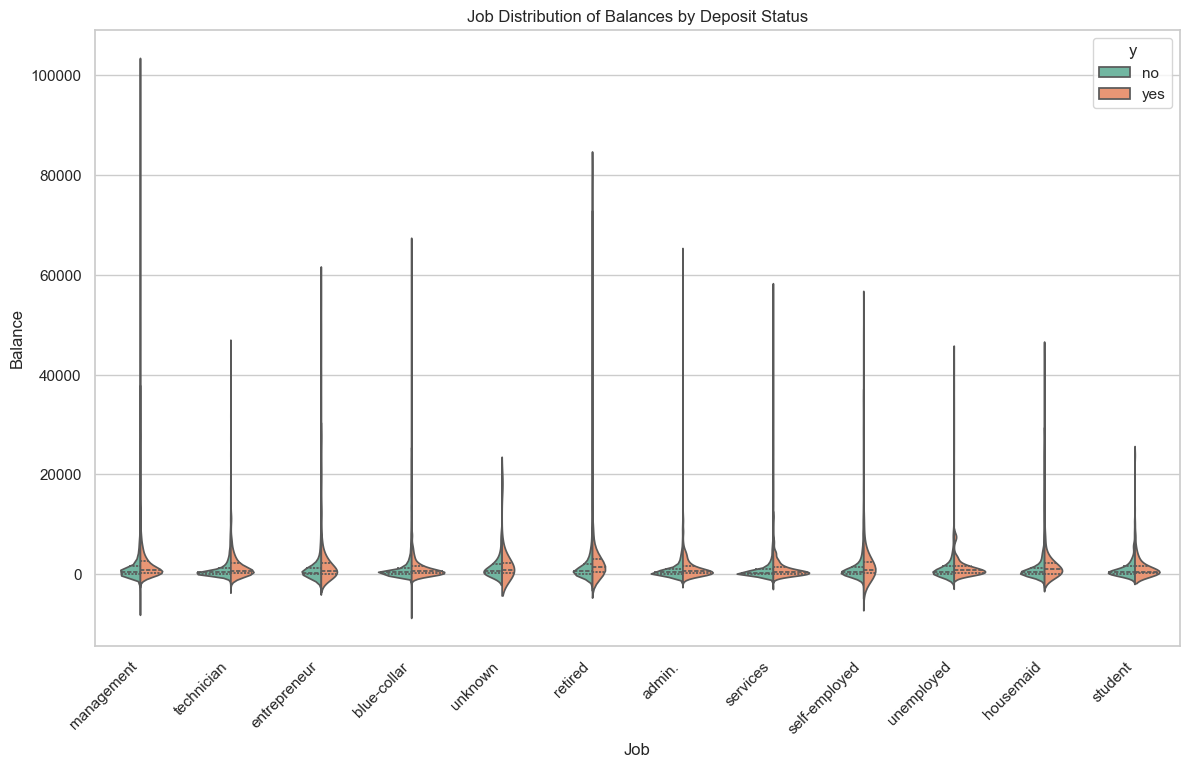

In [72]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.violinplot(x='job', y='balance', hue='y', data=bank_full, palette="Set2", split=True, inner="quartile")
plt.title('Job Distribution of Balances by Deposit Status')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=45, ha="right")
plt.show()


Wider sections indicate a higher density of data points. We can observe the wider sectons in services, blue-collar segments.

A symmetric violin plot indicates a roughly equal distribution of data on both sides of the central point.
Skewness in the plot, where one side is longer or thicker than the other, suggests an uneven distribution. We can observe an uneven distribution in technician, self-employed, unemployed segments.

The tails of the violin extend outward, showing the range of the data. The longer the tails, the more spread out the distribution. Mostly in management and retired segments are spread out the distribution.

Analysis of Marital Status:

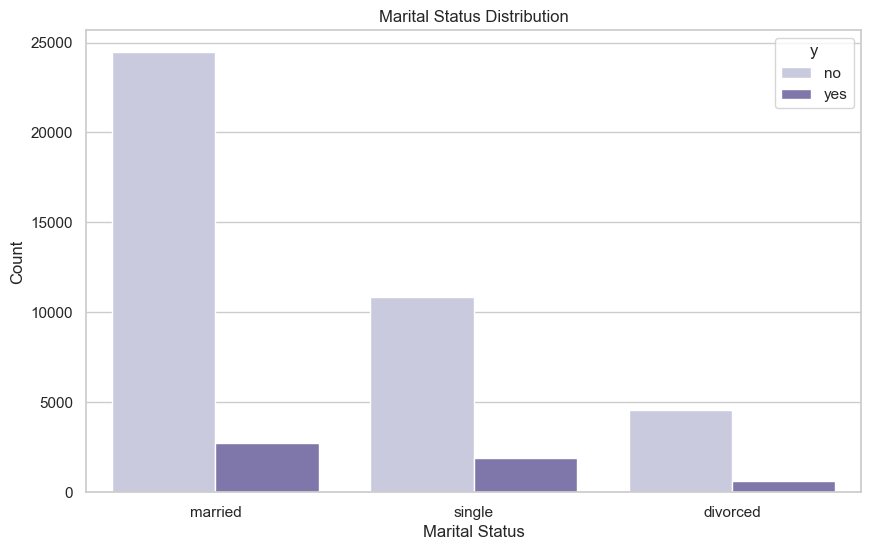

In [80]:
colors = sns.color_palette("Purples", 2)

plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=bank_full, palette = colors)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


The count plot illustrates the distribution of marital status for both subscription outcomes (yes and no).
Married individuals have the highest count in both 'yes' and 'no' categories, followed by single individuals, and divorced individuals have the lowest count in both categories.
This suggests that the dataset has a higher proportion of married individuals.

Percentage of Subscriptions within Each Marital Status:

In [ ]:
# Calculate the percentage of subscriptions within each marital status category
marital_percentage = bank_full.groupby('marital')['y'].value_counts(normalize=True).unstack() * 100
print(marital_percentage)

y                no        yes
marital                       
divorced  88.054542  11.945458
married   89.876534  10.123466
single    85.050821  14.949179


The table shows the percentage of subscriptions ('yes' and 'no') within each marital status category.
For each marital status:
The 'no' percentage represents the proportion of non-subscribers.
The 'yes' percentage represents the proportion of subscribers.
Within the 'married' category, about 89.88% did not subscribe ('no'), and 10.12% subscribed ('yes').
Within the 'divorced' category, about 88.05% did not subscribe ('no'), and 11.95% subscribed ('yes').
Within the 'single' category, about 85.05% did not subscribe ('no'), and 14.95% subscribed ('yes').

In terms of the percentage proportion within each marital status, we can see that the largest number of subscribers are single, while the largest number of non-subscribers are married.

Let's see the Average Balance by Marital Status and Deposit Status

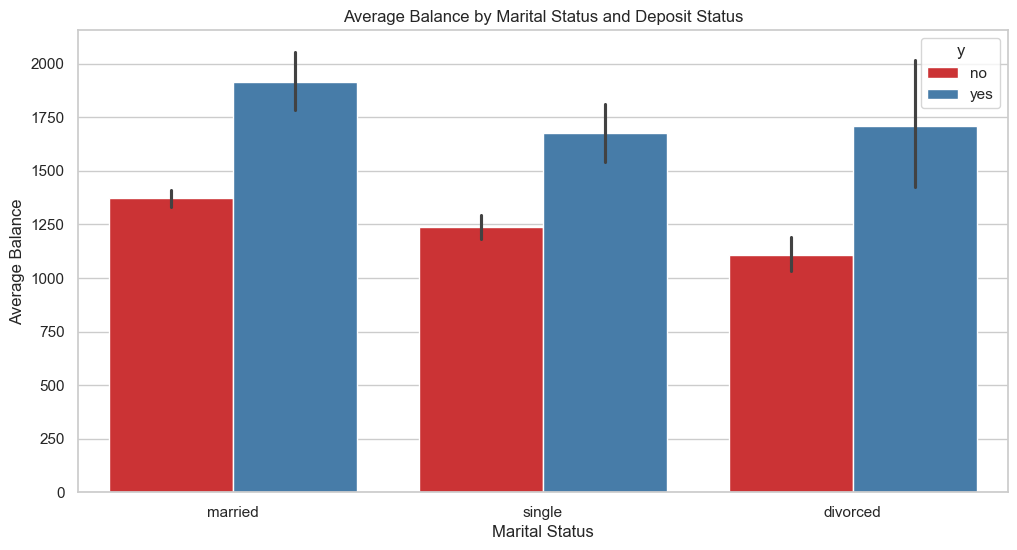

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x='marital', y='balance', hue='y', data=bank_full, palette="Set1")
plt.title('Average Balance by Marital Status and Deposit Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Balance')
plt.show()


The bar plot displays the average balance for each marital status, further split by deposit status ('yes' and 'no').
For 'no' (non-subscribers), married individuals have the highest average balance, followed by single individuals, and divorced individuals have the lowest average balance.
For 'yes' (subscribers), the order changes, with married individuals still having the highest average balance, followed by divorced individuals, and single individuals having the lowest average balance.

Overall Summary:
Married individuals are more prevalent in the dataset.
Divorced individuals generally have lower counts, lower subscription percentages, and lower average balances compared to married and single individuals.
Single individuals tend to have intermediate counts and subscription percentages, while married individuals have the highest counts and average balances.

People typically take out loans when they get married. Let's verify if this pattern aligns with our data.

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_31494/3983752616.py:7: UserWarning:

The palette list has more values (6) than needed (3), which may not be intended.

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_31494/3983752616.py:11: UserWarning:

The palette list has more values (6) than needed (3), which may not be intended.

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_31494/3983752616.py:15: UserWarning:

The palette list has more values (6) than needed (3), which may not be intended.



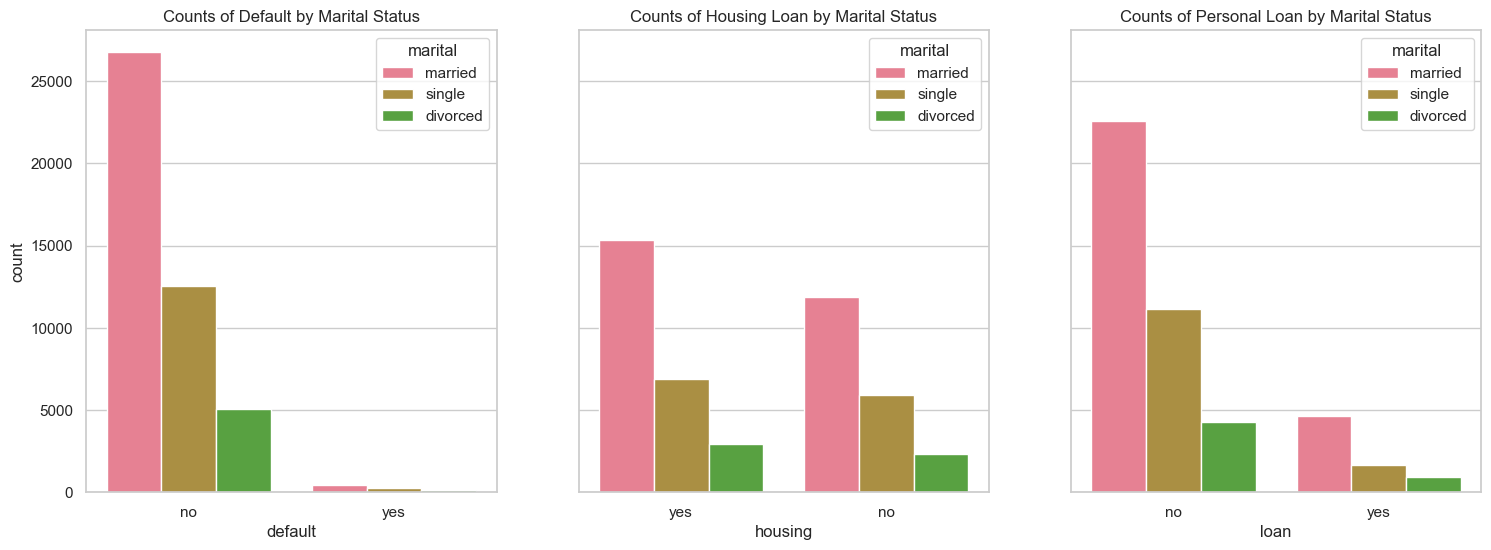

In [ ]:
# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

palette = sns.color_palette("husl")

# Plot counts for 'default' by marital status
sns.countplot(x='default', hue='marital', data=bank_full, ax=axes[0], palette=palette)
axes[0].set_title('Counts of Default by Marital Status')

# Plot counts for 'housing' by marital status
sns.countplot(x='housing', hue='marital', data=bank_full, ax=axes[1], palette=palette)
axes[1].set_title('Counts of Housing Loan by Marital Status')

# Plot counts for 'loan' by marital status
sns.countplot(x='loan', hue='marital', data=bank_full, ax=axes[2], palette=palette)
axes[2].set_title('Counts of Personal Loan by Marital Status')

plt.show()


We can observe that married individuals predominate in the number of all types of loans studied. Single individuals come next, and divorced individuals have the fewest loans.

Let's analyse Months of Marketing Activity, and Seasonality:

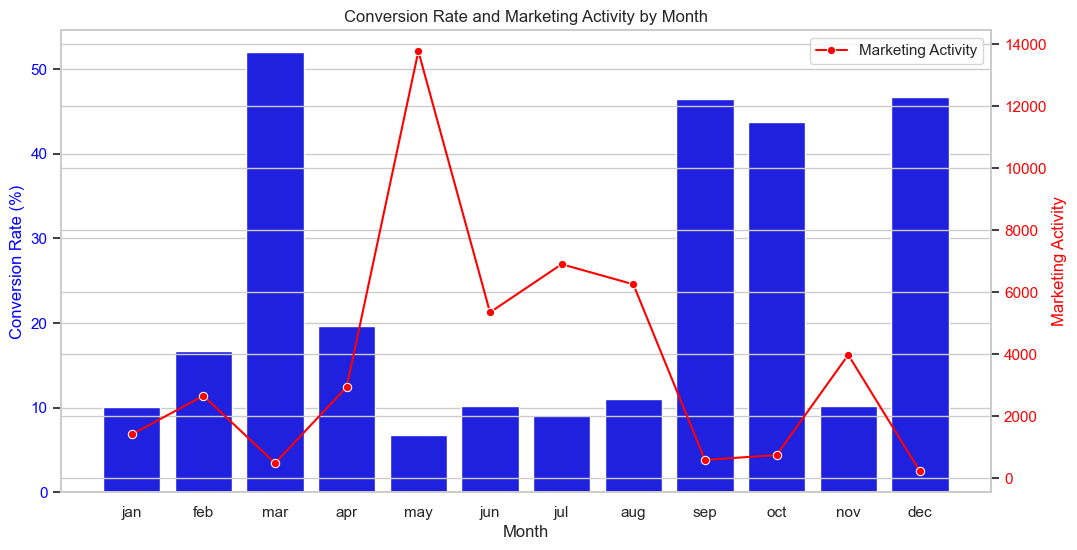

In [ ]:
# 1. Conversion Rate by Month
bank_full['y'] = bank_full['y'].map({'yes': 1, 'no': 0})
month_conversion_rates = bank_full.groupby('month')['y'].mean() * 100

# 2. Marketing Activity by Month
marketing_activity = bank_full['month'].value_counts().sort_index()

month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
sorted_marketing_activity = marketing_activity.reindex(month_order)

# 3. Comparative Analysis of Conversion Rates and Marketing Activity
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Conversion Rate
sns.barplot(x=month_conversion_rates.index, y=month_conversion_rates.values, order=month_order, color='blue', ax=ax1)

ax1.set_xlabel('Month')
ax1.set_ylabel('Conversion Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for Marketing Activity on a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=sorted_marketing_activity.index, y=sorted_marketing_activity.values, color='red', marker='o', label='Marketing Activity', ax=ax2)
ax2.set_ylabel('Marketing Activity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Conversion Rate and Marketing Activity by Month')
plt.show()

Conversion Rate by Month:
The conversion rate by month represents the percentage of clients who subscribed to a term deposit relative to the total number of clients contacted during a specific month.
The higher the conversion rate, the more successful the marketing efforts were in persuading clients to subscribe to a term deposit during that month.

Marketing Activity by Month:
Marketing activity by month refers to the total number of contacts made with clients during a specific month, providing insight into the level of outreach and engagement during different periods.
The higher marketing activity in May suggests that more contacts or interactions with clients occurred during that month compared to others.

Analysis of Months of Marketing Activity:
May - High Marketing Activity:

Observation: May witnessed the highest marketing activity, indicating a significant number of client contacts or outreach efforts.
Possible Explanation: Seasonal factors, promotions, or specific campaigns may have contributed to the increased marketing activity in May.

Conversion Rates in March, September, October, and December:

Observation: March, September, October, and December recorded the highest conversion rates.
Positive Aspects: These months were particularly successful in terms of converting client contacts into term deposit subscriptions.
Potential Strategies: Identify the successful elements of the campaigns during these months and consider replicating or refining those strategies.

Low Effective Rate in May:

Observation: Despite high marketing activity in May, the conversion rate was not as high, indicating a lower effectiveness in turning contacts into subscriptions.
Recommendation: Investigate the reasons behind the lower conversion rate in May. Assess campaign messaging, incentives, and customer targeting to improve effectiveness.

Recommendations for Future Marketing Campaigns:
Focus on Successful Elements:

Recommendation: Identify and replicate successful elements, strategies, or themes from campaigns in March, September, October, and December. These months can serve as benchmarks for effective marketing.

Analyze May Campaign Effectiveness:

Recommendation: Conduct a detailed analysis of the marketing campaigns in May. Understand why the conversion rate was relatively low despite high activity. Consider adjustments to messaging, timing, or incentives.

Explore Seasonal Campaigns:

Recommendation: Consider tailoring campaigns based on seasonal trends. Analyze the impact of seasonality on customer behavior and preferences. For example, if fall and winter months show higher conversion rates, design campaigns that align with customer preferences during those seasons.

By implementing these recommendations, the bank can optimize its marketing strategies, enhance conversion rates, and build a more effective and targeted approach to engaging with clients.

Let's plot a correlation matrix to observe the corelation of each columns

In [ ]:
bank_full.drop(['balance_status'], axis=1, inplace=True)

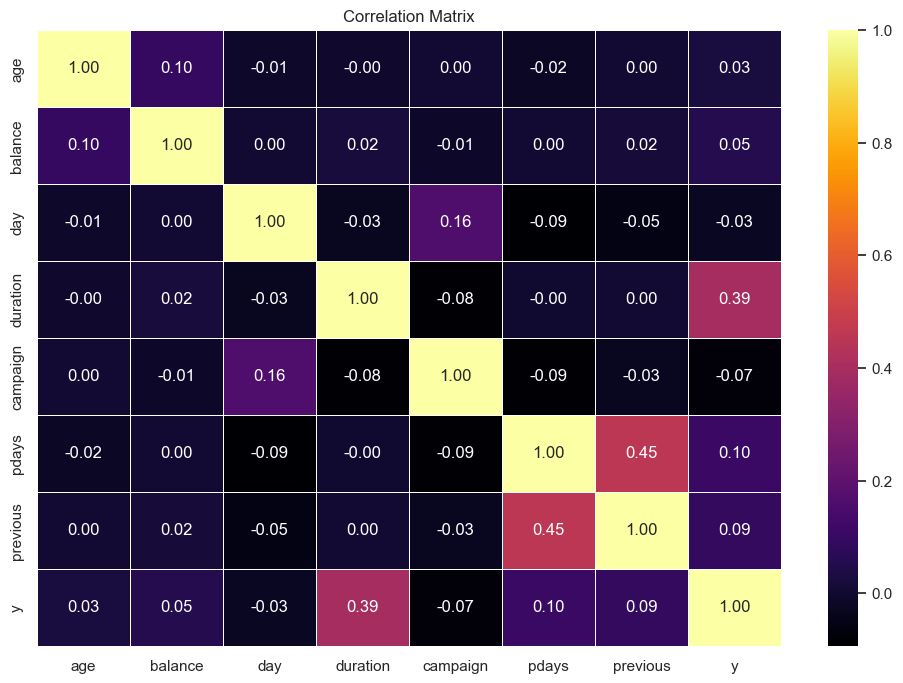

In [ ]:
numeric_columns = bank_full.select_dtypes(include=['int64', 'float64']).columns
numeric_data = bank_full[numeric_columns]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


As we can see, one of the most significant correlations (0.39) is between 'duration' and 'y' (subscription to the deposit). The relationship is positive, indicating that with a longer duration of conversation, people tend to opt for a deposit.
Also we'll explore umber of days that passed by after the client was last contacted from a previous campaign (pdays), with 0.10 positive relationship, and number of contacts performed before this campaign and for this client (previous)- with 0.09 positive relationship. 
Furthermore, we'll explore the number of contacts performed during this campaign and for this client (campaign)- with -0.07, negative rrelatioship. Which means the more number of contacts bank provide - less likely that the client will subscribe.

Let's start with exploration of campaign Duration:

In [ ]:
avg_duration = bank_full['duration'].mean()
print(f'Average Campaign Duration: {avg_duration} sec.')

Average Campaign Duration: 258.1630797814691 sec.


The average campaign duration is 258.16,
let's see if clients that were above this average were more likely to open a term deposit.

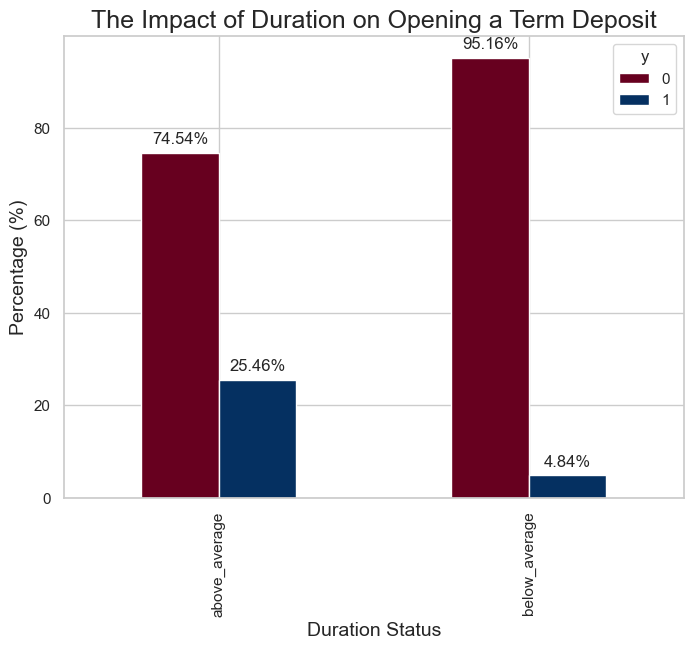

In [ ]:
sns.set(rc={'figure.figsize': (8, 6)})
sns.set_style('whitegrid')

avg_duration = bank_full['duration'].mean()

# Create a new column 'duration_status' based on the comparison with the average duration
bank_full["duration_status"] = np.where(bank_full["duration"] > avg_duration, "above_average", "below_average")

# Calculate the percentage of term deposits for each duration status
pct_term = pd.crosstab(bank_full['duration_status'], bank_full['y'], normalize='index') * 100

# Plot the bar chart
ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration on Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The duration of telephone calls seems to have a notable impact on the likelihood of clients opening a term deposit.
Clients with above-average call durations are more likely to open term deposits, with a higher percentage of 'yes' responses (25.46%).
Clients with below-average call durations are less likely to open term deposits, with a much lower percentage of 'yes' responses (4.84%).

Recommendations:

This information can be valuable for targeted marketing strategies. For instance, efforts could be focused on extending the duration of calls to increase the likelihood of a client opening a term deposit.
Understanding this relationship allows for more informed decision-making when designing future marketing campaigns or client interactions.

Another correlation 0.10 - positive relationship is between pdays and y.
Let's explore number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

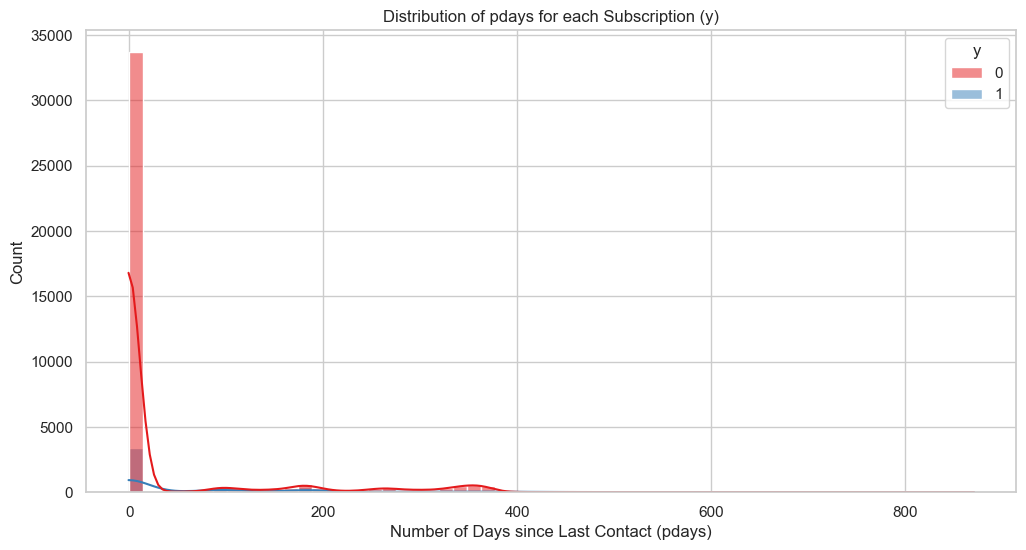

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=bank_full, x='pdays', hue='y', bins=60, kde=True, palette='Set1')
plt.title('Distribution of pdays for each Subscription (y)')
plt.xlabel('Number of Days since Last Contact (pdays)')
plt.ylabel('Count')
plt.show()

We can observe a positive relationship: the larger the number of days that have passed, the greater the number of people subscribing to the deposit. The first bin with a high number corresponds to (-1), which means the client was not previously contacted.

Let's analyze the relationship between the number of contacts ('campaign' and 'previous') and the success outcome of the previous campaign ('poutcome'), as well as the likelihood of the client subscribing to a deposit ('y').

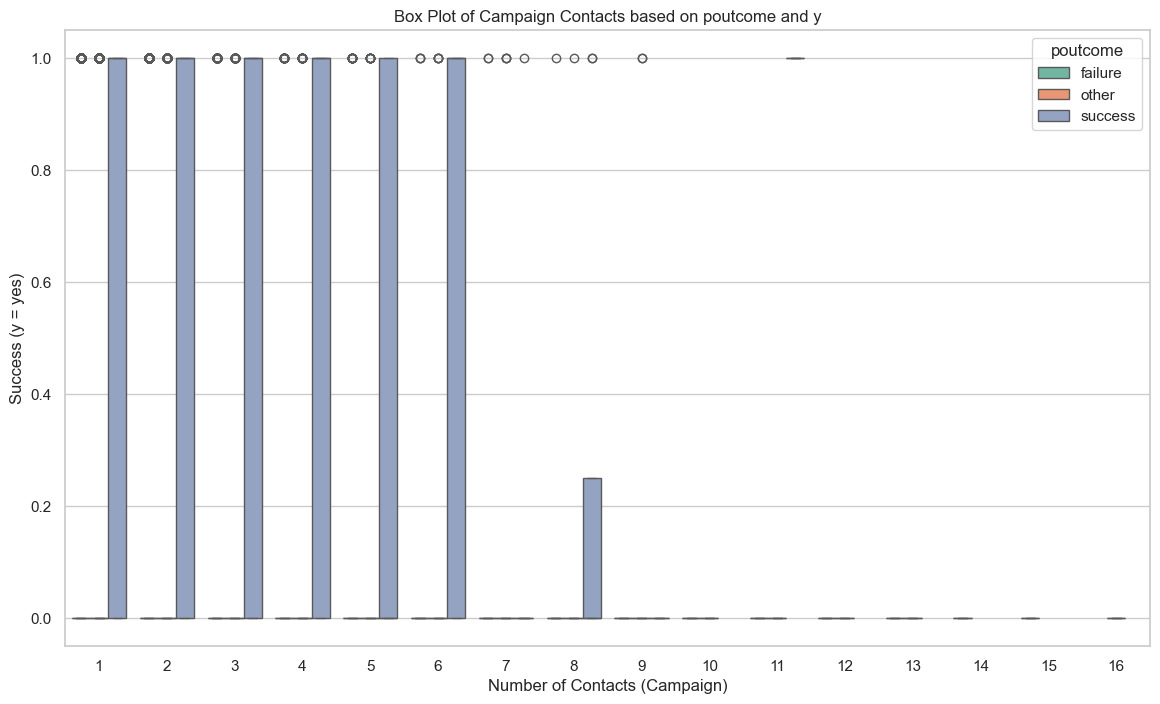

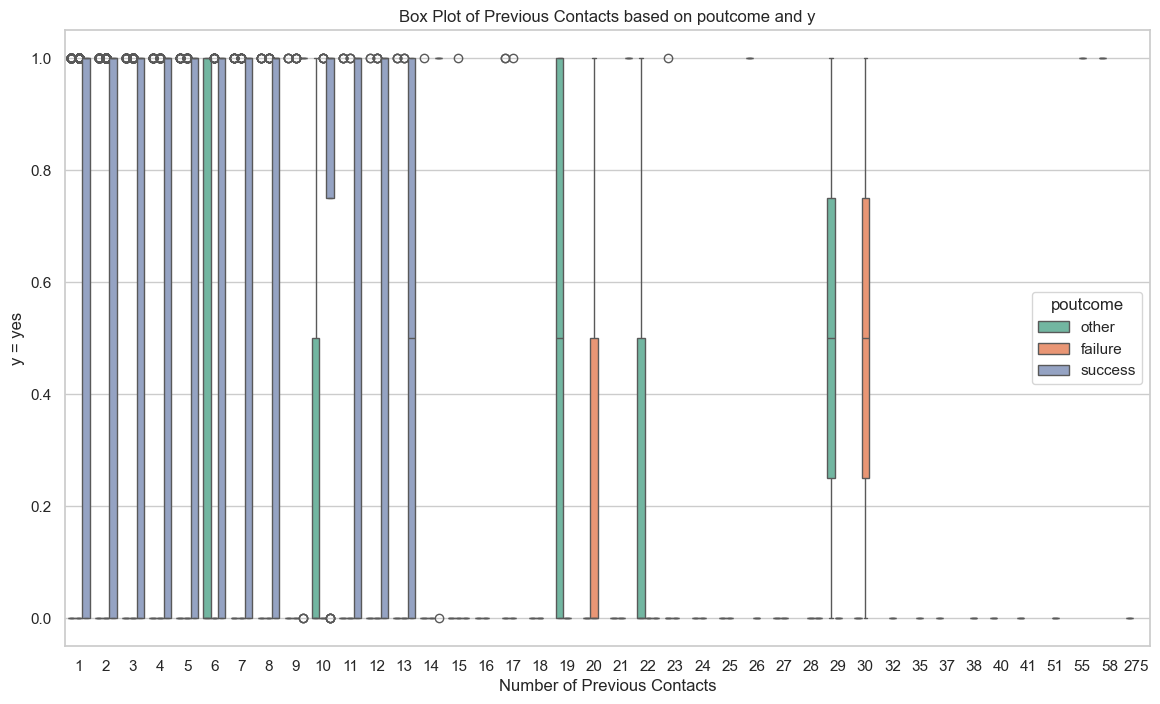

In [ ]:
# Exclude rows with "unknown" in poutcome
bank_full_filtered = bank_full[bank_full['poutcome'] != 'unknown']

# Set the style of seaborn
sns.set(style="whitegrid")

# Box plot for number of campaign contacts
plt.figure(figsize=(14, 8))
sns.boxplot(data=bank_full_filtered, x='campaign', y='y', hue='poutcome', palette='Set2')
plt.title('Box Plot of Campaign Contacts based on poutcome and y')
plt.xlabel('Number of Contacts (Campaign)')
plt.ylabel('Success (y = yes)')
plt.show()

# Box plot for number of previous contacts
plt.figure(figsize=(14, 8))
sns.boxplot(data=bank_full_filtered, x='previous', y='y', hue='poutcome', palette='Set2')
plt.title('Box Plot of Previous Contacts based on poutcome and y')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('y = yes')
plt.show()



The first plot shows the distribution of the number of campaign contacts (campaign) based on poutcome and success (y = 'yes').
The second plot shows the distribution of the number of previous contacts (previous) based on poutcome and success (y = 'yes').

We can observe the failure outcome appears when contact too many times(about 20).

Let's split all the numbers of contacts into 3 groups : 1 - 3 calls, 3 - 10 calls, and more then 10 calls, and explore it's behavior and influence on outcome of the previous marketing campaign. 

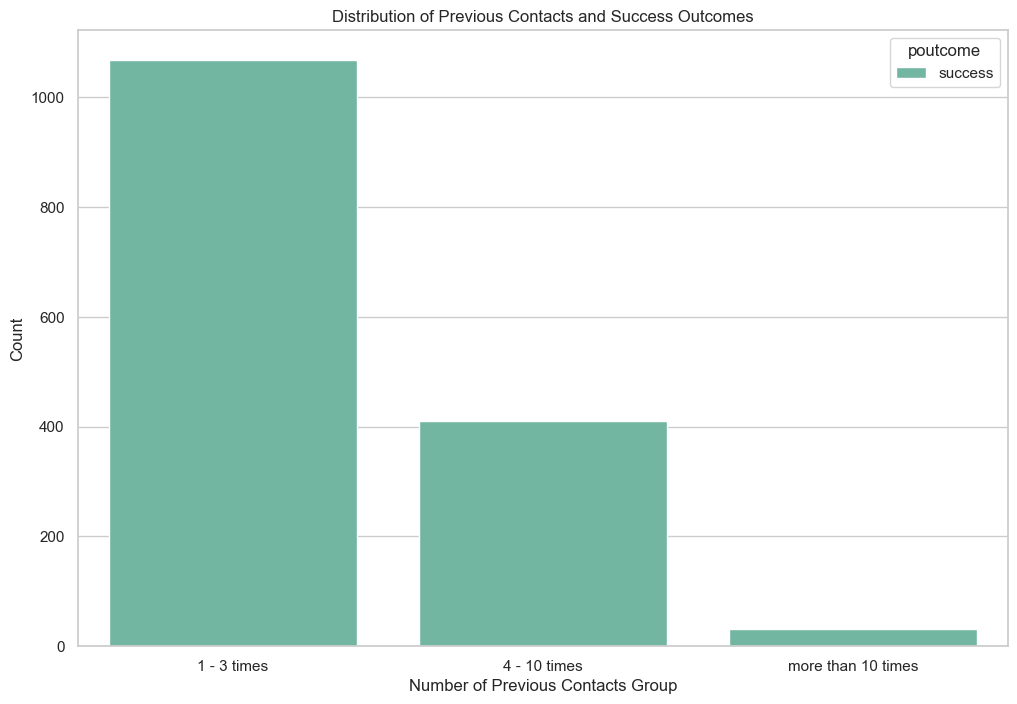

In [ ]:
# Create groups based on the number of previous contacts
def create_contact_groups(x):
    if x <= 3:
        return '1 - 3 times'
    elif x <= 10:
        return '4 - 10 times'
    else:
        return 'more than 10 times'

# Apply the function to create a new column 'contact_group'
bank_full['contact_group'] = bank_full['previous'].apply(create_contact_groups)

# Filter out "unknown" values in poutcome
bank_filtered = bank_full[bank_full['poutcome'] != 'unknown']

# Filter rows with 'success' in poutcome
success_rows = bank_filtered[bank_filtered['poutcome'] == 'success']

# Create a grouped bar plot for success outcomes only
plt.figure(figsize=(12, 8))
sns.countplot(data=success_rows, x='contact_group', hue='poutcome', palette='Set2', hue_order=['success'])

# Set labels and title
plt.title('Distribution of Previous Contacts and Success Outcomes')
plt.xlabel('Number of Previous Contacts Group')
plt.ylabel('Count')

# Show the plot
plt.show()


We can observe that by providing 1 - 3 calls, the bank received more 'success' feedbacks.
Let's see numeric charactaristic.

In [ ]:
# Filter out "unknown" values in poutcome and where y is 1
success_and_subscribed = bank_full[(bank_full['poutcome'] == 'success') & (bank_full['y'] == 1)]

# Count occurrences for each contact group
counts_by_contact_group = success_and_subscribed['contact_group'].value_counts()

# Display the counts
print(counts_by_contact_group)

contact_group
1 - 3 times           679
4 - 10 times          281
more than 10 times     18
Name: count, dtype: int64


A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

Let's evaluate the effectiveness of different communication channels.

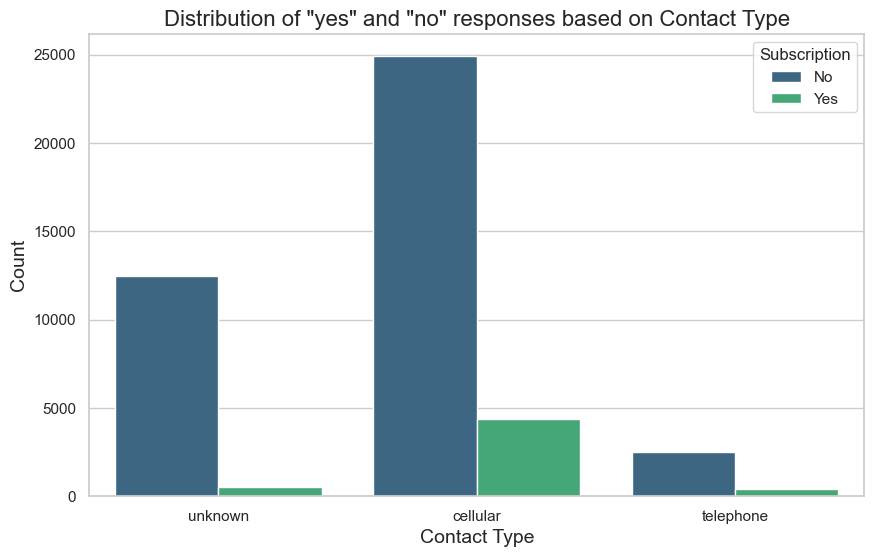

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=bank_full, palette='viridis')
plt.title('Distribution of "yes" and "no" responses based on Contact Type', fontsize=16)
plt.xlabel('Contact Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscription', labels=['No', 'Yes'])

plt.show()


Based on the analyse, the most effective communication chanel is cellular.
Recommendation for bank : Diversify marketing strategies based on channel performance, ensuring a multi-channel approach that resonates with the preferences of diverse customer segments.

Campaign Effectiveness Analysis:

In [ ]:
total_clients = len(bank_full)

# Conversion Rate
subscribed_clients = bank_full[bank_full['y'] == 1]['y'].count()
conversion_rate = (subscribed_clients / total_clients) * 100

# Response Rate
interested_clients = bank_full[(bank_full['y'] == 1) | (bank_full['poutcome'].isin(['success', 'other']))]['y'].count()
response_rate = (interested_clients / total_clients) * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")
print(f"Response Rate: {response_rate:.2f}%")


Conversion Rate: 11.70%
Response Rate: 16.27%


Conversion Rate (11.70%):

The Conversion Rate of 11.70% indicates that approximately 11.70% of the clients in your dataset have subscribed to a term deposit.
This can be considered a moderately positive conversion rate, suggesting that a notable portion of clients has shown interest in the term deposit.

Response Rate (11.70%):

The Response Rate includes not only clients who subscribed to a term deposit but also those who showed interest, as indicated by the 'poutcome' variable.
A Response Rate of 11.70% signifies that around 11.70% of the clients either subscribed to a term deposit or showed interest in the marketing campaign.
This rate provides a broader view of the campaign's effectiveness by considering positive responses beyond direct subscriptions.
A Response Rate identical to the Conversion Rate suggests that the majority of positive responses are due to direct subscriptions rather than other forms of interest.

In summary, a Conversion Rate and Response Rate of 11.70% each suggest a reasonably positive outcome from the marketing campaign. Further exploration into the characteristics of clients who responded positively and analysis of successful campaigns can provide valuable insights for future marketing strategies.

Predictive Modeling:
Random Forest Classification Model

In [ ]:
bank_full.dtypes

age                 int64
job                object
marital            object
education          object
default            object
balance             int64
housing            object
loan               object
contact            object
day                 int64
month              object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
y                   int64
duration_status    object
contact_group      object
dtype: object

In [ ]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_status,contact_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,above_average,1 - 3 times
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,below_average,1 - 3 times
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,below_average,1 - 3 times
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,below_average,1 - 3 times
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,below_average,1 - 3 times


Library:

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Label Encoder:

This code applies the LabelEncoder to the specified categorical columns in our DataFrame, transforming them into numerical representations.

In [ ]:
le = LabelEncoder()
bank_full['housing'] = le.fit_transform(bank_full['housing'])
bank_full['deposit'] = le.fit_transform(bank_full['y'])
bank_full['loan'] = le.fit_transform(bank_full['loan'])
bank_full['default'] = le.fit_transform(bank_full['default'])

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

Lets create categorical list

In [ ]:
cat_list = ['marital','job', 'education', 'month', 'contact', 'poutcome']
for column in cat_list:
    one_hot_encoded = pd.get_dummies(bank_full[column], prefix=column, drop_first=True)
    bank_full = pd.concat([bank_full, one_hot_encoded], axis=1)

# Drop the original categorical columns from the DataFrame
bank_full.drop(cat_list, axis=1, inplace=True)

# Display the modified DataFrame
print(bank_full.head())

   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  ...  month_mar month_may month_nov  month_oct  month_sep  \
0         0  ...      False      True     False      False      False   
1         0  ...      False      True     False      False      False   
2         0  ...      False      True     False      False      False   
3         0  ...      False      True     False      False      False   
4         0  ...      False      True     False      False      False   

   contact_telephone  contact_unknown  poutcome_other  poutcome_success  \
0              False             Tr

In [ ]:
bank_full.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'duration_status',
       'contact_group', 'deposit', 'marital_married', 'marital_single',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

Train-Test Split:

In [ ]:
# One-hot encoding for 'duration_status' and 'contact_group'
columns_to_one_hot_encode = ['duration_status', 'contact_group']

for column in columns_to_one_hot_encode:
    one_hot_encoded = pd.get_dummies(bank_full[column], prefix=column, drop_first=True)
    bank_full = pd.concat([bank_full, one_hot_encoded], axis=1)

# Drop the original categorical columns from the DataFrame
bank_full.drop(columns_to_one_hot_encode, axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features and target variable
job = ['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
education = ['education_secondary', 'education_tertiary', 'education_unknown']
features = bank_full[['age', 'duration', 'balance'] + job + education]
target = bank_full['y']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Use StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      7952
           1       0.51      0.26      0.34      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.61      0.64      9043
weighted avg       0.86      0.88      0.86      9043


Accuracy: 0.8806811898706182


Precision:

Precision for class 0 (not subscribing to a term deposit) is 0.90. This means that out of all instances predicted as not subscribing, 90% were correct.
Precision for class 1 (subscribing to a term deposit) is 0.51. This indicates that out of all instances predicted as subscribing, 51% were correct.
Recall (Sensitivity):

Recall for class 0 is 0.97. This suggests that the model correctly identified 97% of the instances where the actual outcome is not subscribing.
Recall for class 1 is 0.26. This implies that the model captured only 26% of the actual instances where the outcome is subscribing.
F1-score:

The F1-score is a balance between precision and recall. The weighted average F1-score is 0.86. It's important to note that the F1-score considers both false positives and false negatives, providing a comprehensive measure of a model's performance.
Accuracy:

The overall accuracy of the model is 0.88, which is the proportion of correctly classified instances out of the total instances. However, accuracy alone may not be sufficient, especially when dealing with imbalanced datasets.
Interpretation:

The model performs well in terms of precision and recall for class 0, indicating it can effectively predict instances not subscribing to a term deposit. However, for class 1, the precision is moderate, suggesting that the model has some success in predicting instances subscribing to a term deposit. The low recall for class 1 indicates that the model misses a significant portion of actual subscribing instances.

In [ ]:
#Check size
dataset_size = bank_full.shape

# Print the number of rows and columns
print(f"Number of Rows: {dataset_size[0]}")
print(f"Number of Columns: {dataset_size[1]}")


Number of Rows: 45211
Number of Columns: 47


Having a relatively large dataset is beneficial for training machine learning models, as it provides more examples for the model to learn from and helps ensure that the learned patterns generalize well to new, unseen data.
Given the size of this dataset, we have a good foundation for building and evaluating predictive models.

Cross-validation involves splitting the dataset into multiple subsets (folds), training the model on different combinations of training and validation sets, and assessing its performance across these subsets. One common approach is k-fold cross-validation, where the data is divided into k folds, and the model is trained and validated k times, each time using a different fold for validation.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
num_folds = 5

# Create a StratifiedKFold object for maintaining class distribution in each fold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation
cross_val_results = cross_val_score(classifier, features, target, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Results:")
for i, accuracy in enumerate(cross_val_results, 1):
    print(f"Fold {i}: {accuracy:.4f}")
print(f"\nAverage Accuracy: {cross_val_results.mean():.4f}")


Cross-Validation Results:
Fold 1: 0.8860
Fold 2: 0.8837
Fold 3: 0.8874
Fold 4: 0.8873
Fold 5: 0.8816

Average Accuracy: 0.8852


Fold Accuracy:

The accuracy for each fold ranges from 0.8816 to 0.8874.
Average Accuracy:

The average accuracy across all folds is calculated to be 0.8852.
Interpretation:

Cross-validation provides an estimate of the model's generalization performance by training and evaluating it on different subsets of the dataset. The average accuracy of 0.8852 suggests that the model is reasonably consistent in its performance across different subsets.
Considerations:

A consistent and high average accuracy is a positive indication. However, it's essential to consider other metrics and aspects such as precision, recall, and the specific requirements of the application. Additionally, we may explore hyperparameter tuning or feature engineering to further improve the model's performance.


Confusion Matrix:

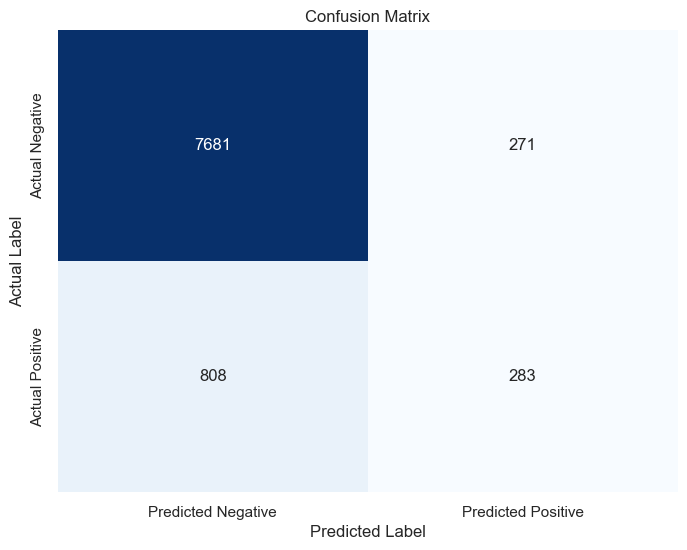

In [79]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()



True Positives (TP):

The model correctly predicted 283 instances as subscribers.

True Negatives (TN):

The model correctly predicted 7681 instances as non-subscribers.

False Positives (FP):

The model incorrectly predicted 271 instances as subscribers when they were actually non-subscribers.

False Negatives (FN):

The model incorrectly predicted 808 instances as non-subscribers when they were actually subscribers.

Precision:

Precision, which measures the accuracy of positive predictions, is given by TP / (TP + FP). In this case, it would be 283 / (283 + 271), indicating the proportion of correctly predicted positive instances among all instances predicted as positive.
Recall (Sensitivity):

Recall, which measures the ability of the model to capture all positive instances, is given by TP / (TP + FN). In this case, it would be 283 / (283 + 808), indicating the proportion of correctly predicted positive instances among all actual positive instances.
Interpretation:

The model shows relatively better performance in terms of precision, suggesting that when it predicts a positive outcome, it is correct more often than not. However, the lower recall indicates that the model misses a notable proportion of actual positive instances.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"Precision represents the proportion of positive identifications that were actually correct: {precision:.4f}")
print(f"Recall (Sensitivity) represents the proportion of actual positives that were correctly identified: {recall:.4f}")
print(f"F1-score is a balance between precision and recall: {f1:.4f}")


Precision: 0.5108
Recall: 0.2594
F1-score: 0.3441

Interpretation:
Precision represents the proportion of positive identifications that were actually correct: 0.5108
Recall (Sensitivity) represents the proportion of actual positives that were correctly identified: 0.2594
F1-score is a balance between precision and recall: 0.3441


Precision (Positive Predictive Value):

Precision is the proportion of positive identifications made by the model that were actually correct. A precision of 0.5108 indicates that approximately 51.08% of the instances predicted as positive were true positives.
Recall (Sensitivity, True Positive Rate):

Recall is the proportion of actual positive instances that were correctly identified by the model. A recall of 0.2594 suggests that the model captured approximately 25.94% of all actual positive instances.
F1-score:

F1-score is the harmonic mean of precision and recall, providing a balanced measure. A F1-score of 0.3441 indicates a balance between precision and recall, considering both false positives and false negatives.
Interpretation:

The precision suggests that when the model predicts a positive outcome, it is correct more than half of the time. However, the relatively low recall indicates that the model is missing a significant proportion of actual positive instances.

Feature Importance and Interpretability:

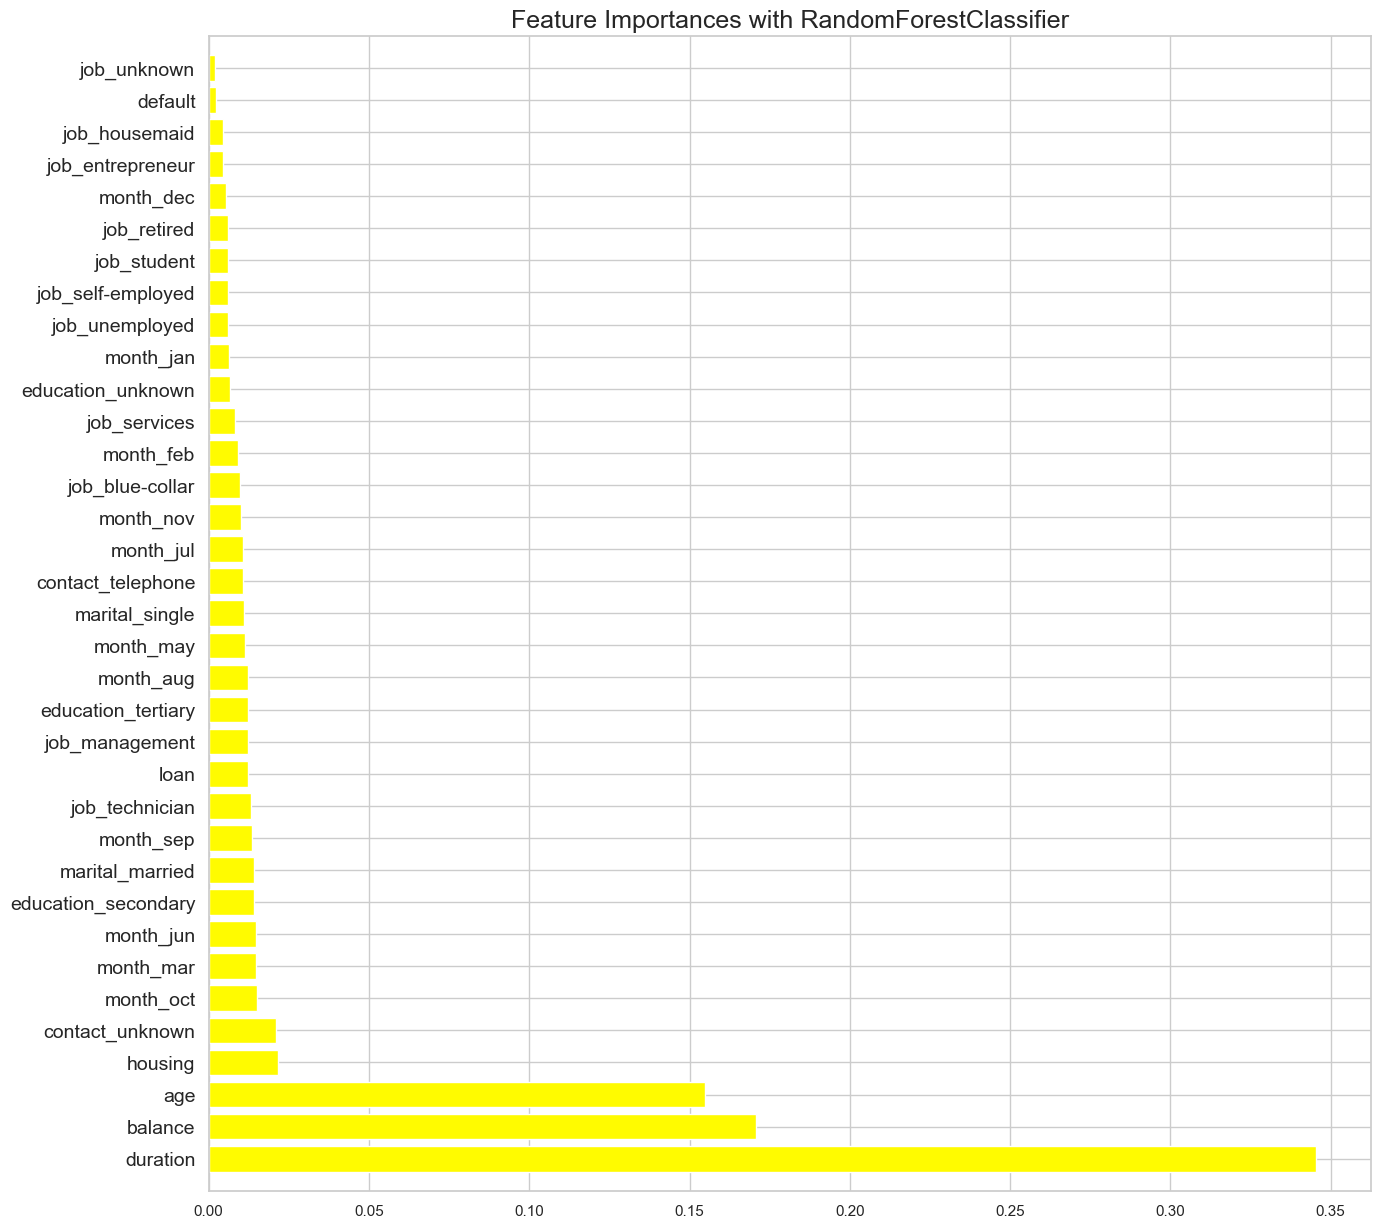

In [ ]:
# Extract features and target variable
job = ['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
education = ['education_secondary', 'education_tertiary', 'education_unknown']
marital=['marital_married','marital_single']
month = ['month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep']
contact = ['contact_telephone', 'contact_unknown']
features = bank_full[['age', 'duration', 'balance','default','housing','loan'] + job + education+ marital+month+contact]
target = bank_full['y']

# Create a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
classifier.fit(features, target)

# Extract feature importance
feature_importance = classifier.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(15, 15))
plt.title("Feature Importances with RandomForestClassifier", fontsize=18)
plt.barh(range(len(indices)), feature_importance[indices], color='#fffb00', align="center")
plt.yticks(range(len(indices)), features.columns[indices], rotation='horizontal', fontsize=14)
plt.ylim([-1, len(indices)])
plt.show()



The feature importance analysis provides insights into the factors that significantly influence customer decisions in the context of marketing outcomes. Here's an interpretation of the results:

Duration (Importance: 34.53%):

Duration of the call appears to be the most influential feature.
Longer call durations may contribute positively to successful marketing outcomes, suggesting that more extended conversations are associated with positive customer responses.
Balance (Importance: 17.09%):

Customer balance plays a substantial role, indicating that individuals with higher balances are more likely to respond positively to marketing efforts.
Age (Importance: 15.48%):

Age is another significant factor, suggesting that different age groups may respond differently to marketing campaigns.
Housing (Importance: 2.17%):

The presence or absence of a housing loan has a relatively lower impact compared to other factors.
Contact Method - Unknown (Importance: 2.10%):

Customers contacted through unknown methods show importance, and understanding the nature of these interactions could be valuable.
Month of October (Importance: 1.51%):

Contacting customers in October seems to have a slight positive impact on marketing outcomes.
Education Level - Secondary (Importance: 1.43%):

Customers with a secondary education background may respond differently compared to other education levels.
Marital Status - Married (Importance: 1.42%):

Married individuals have a slight impact on marketing outcomes compared to other marital statuses.
Contact Method - Telephone (Importance: 1.07%):

Telephone communication method has a moderate impact on customer responses.
Month of June (Importance: 1.46%):

Marketing activities conducted in June show a slight positive influence.
These insights can guide marketing strategies, helping focus efforts on key factors that contribute significantly to successful outcomes. It's essential to consider these features collectively to form a comprehensive understanding of customer behavior and tailor marketing approaches accordingly.

Determine Best Threshold:
We are going to use the precision and recall tradeoff technique.

Let's determine the optimal threshold.
We want to return the scores instead of predictions with this code.

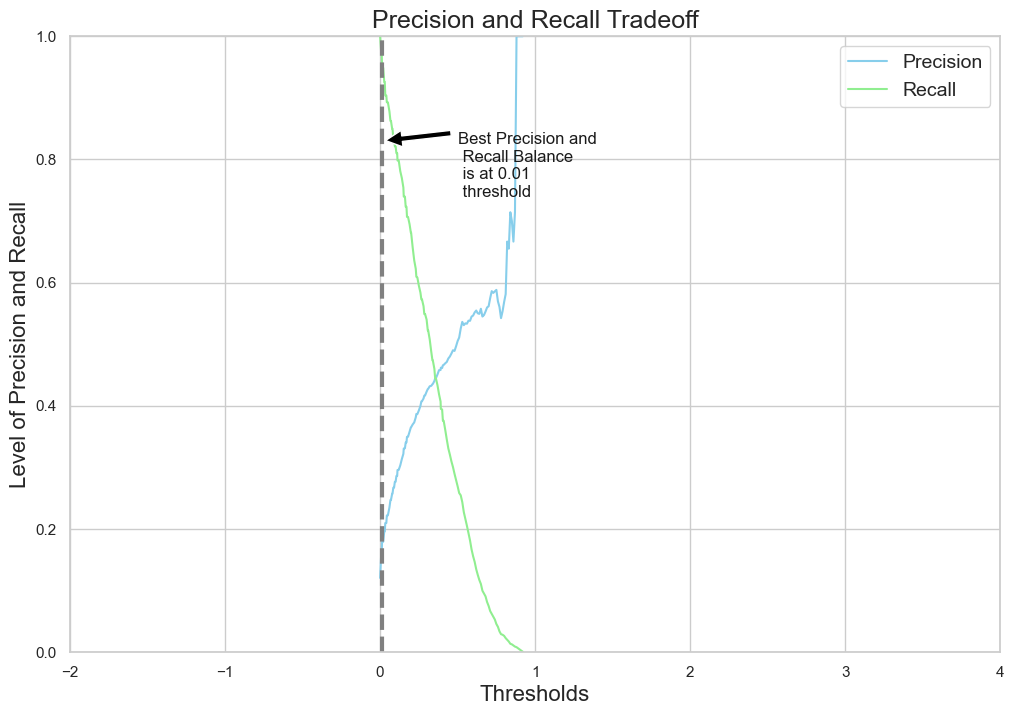

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

def custom_precision_recall_curve(precisions, recalls, thresholds, optimal_threshold):
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot(thresholds, precisions[:-1], "skyblue", label="Precision")
    plt.plot(thresholds, recalls[:-1], "lightgreen", label="Recall")
    plt.title("Precision and Recall Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4])
    plt.ylim([0, 1])
    plt.axvline(x=optimal_threshold, linewidth=3, color="gray", linestyle="--", label=f'Optimal Threshold = {optimal_threshold:.2f}')
    plt.annotate(f'Best Precision and \n Recall Balance \n is at {optimal_threshold:.2f} \n threshold ', xy=(optimal_threshold, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, 
            color='k')
    plt.show()

# Assuming you have already trained your classifier and obtained predicted probabilities
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)  # Make sure to fit the classifier first

# Assuming X_test and y_test are defined
y_scores = classifier.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold value for the intersection point
optimal_threshold = thresholds[np.argmax(precisions[:-1] + recalls[:-1])]

custom_precision_recall_curve(precisions, recalls, thresholds, optimal_threshold)


The precision-recall curve illustrates the trade-off between precision and recall for different probability thresholds set by a classifier. Let's interpret the key elements of your plot:

Precision Curve (Skyblue Line): Represents how well the classifier identifies true positives among the instances it predicts as positive. Precision is the ratio of true positives to the total predicted positives.

Recall Curve (Lightgreen Line): Demonstrates the classifier's ability to capture all the relevant instances. Recall is the ratio of true positives to the total actual positives.

Thresholds (X-Axis): Each point on the curve corresponds to a specific probability threshold. Moving from left to right along the X-axis increases the threshold, resulting in higher precision but lower recall.

Vertical Gray Line at x = 0.1: This vertical line represents a specific threshold (in this case, 0.1). It appears to be set quite low, favoring higher recall but sacrificing precision.

Intersection at x ≈ 0.3, y ≈ 0.5: The intersection point of the precision and recall curves indicates a balance between precision and recall. It's a critical point where both metrics are reasonably high. This balance is crucial in scenarios where you want to avoid an extreme focus on either precision or recall.

Optimal Threshold (Gray Dashed Line and Annotation): The optimal threshold is determined based on the point of highest sum of precision and recall. In our case, it is annotated with a gray dashed line and text indicating the threshold value.

Interpretation:

The classifier performs well when the threshold is set around the optimal threshold, balancing precision and recall.
The vertical gray line at x = 0.1 suggests a lower threshold that gives a trade-off favoring higher recall but lower precision.

The plot shows us the suggestion to lower the Threshold:

The lowering the Threshold increases the number of instances predicted as positive.
Typically leads to higher recall but lower precision.

ROC Curve (Receiver Operating Characteristic):


The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.



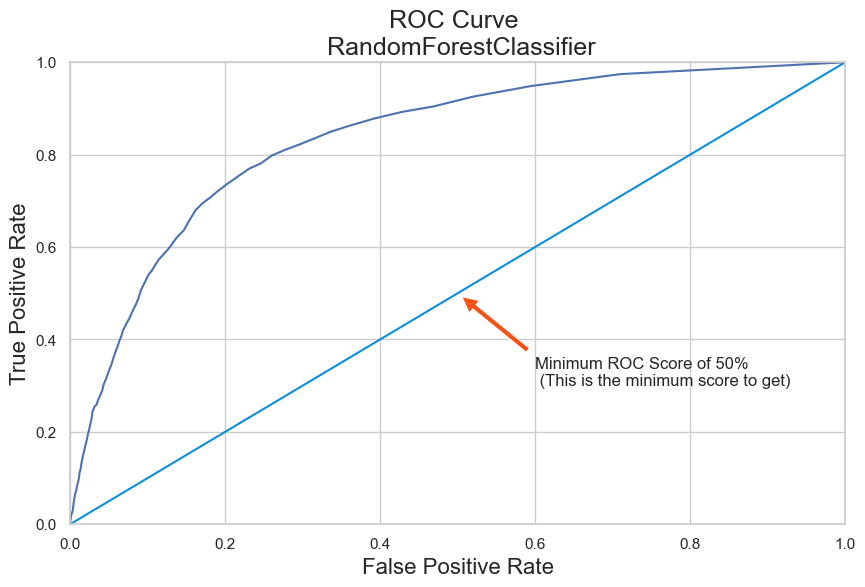

In [ ]:
from sklearn.metrics import roc_curve

# Assuming you have already trained your RandomForestClassifier and obtained predicted probabilities
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)  # Make sure to fit the classifier first

# Predicted probabilities for RandomForestClassifier
y_scores = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n RandomForestClassifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
# Plot the ROC curve for RandomForestClassifier
graph_roc_curve(fpr, tpr)
plt.show()


ROC Curve: The blue line in the plot represents the ROC curve for the Gradient Boosting Classifier. The curve shows the trade-off between TPR and FPR at different classification thresholds. Ideally, we want the ROC curve to be closer to the top-left corner, indicating higher TPR and lower FPR.

Diagonal Line (Random Classifier): The diagonal line (dashed line) represents the performance of a random classifier. Points above this line indicate better-than-random performance.

Annotations: The annotations on the plot provide additional information. The first annotation mentions the ROC score of 91.73%, indicating the area under the ROC curve (AUC). A higher AUC generally indicates better model performance. The second annotation mentions the minimum ROC score of 50%, which represents the performance of a random classifier.

Interpretation: In general, a good classifier will have an ROC curve that rises steeply toward the top-left corner, indicating high sensitivity and low false positive rate across various thresholds. The further the curve is from the diagonal, the better the model.

In our case, the ROC curve aligning with the top-left corner and having a high AUC (Area Under the Curve) score is a positive sign. It suggests that our model has good discrimination ability between positive and negative classes. The closer the curve is to the top-left corner, the better the balance between true positive rate and false positive rate. The high AUC score indicates strong overall performance, making your model effective in distinguishing between the classes.

Recommendation Engine:

Based on the findings and insights derived from your analyses, here are recommendations for improving the bank's marketing efforts and enhancing the success of future campaigns:

Customer Profiling and Targeting:

Leverage the insights from customer demographics, such as age, education, and marital status, to create targeted marketing campaigns. Tailor messages and offers to specific customer segments, considering their preferences and behaviors.

Seasonal Campaign Optimization:

Replicate successful elements from campaigns conducted in March, September, October, and December. Additionally, explore the potential impact of seasonality on customer behavior and preferences, adapting marketing strategies accordingly.

Months of Marketing Activity:

Insight: May witnessed the highest marketing activity, but with a lower conversion rate.
Recommendation: Analyze and refine May's campaign strategies. Consider replicating successful elements from campaigns in March, September, October, and December.

Campaign Duration Optimization:

Capitalize on the positive correlation between call duration and subscription outcomes. Encourage longer call durations during interactions with potential clients to increase the likelihood of term deposit subscriptions.

Duration of Calls:

Insight: Longer call durations positively correlate with higher subscription rates.
Recommendation: Implement a questionnaire strategy during calls to increase engagement and conversation length. Target individuals with above-average call durations for higher success rates.

Optimal Contact Frequency:

Implement a policy limiting the number of calls to the same potential client, suggesting no more than 3 calls. This approach aims to prevent client fatigue and potential declines, optimizing the use of time and resources in acquiring new potential clients.

Age:

Insight: The mean age is approximately 41 years old, with a range from 18 to 95 years old.
Recommendation: Tailor marketing efforts to target individuals in their 20s or younger and those in their 60s or older, as these groups show a higher likelihood of subscribing to term deposits.

Balance:

Insight: The mean balance is 1,362, but the distribution is heavily spread across the dataset.
Recommendation: Focus on individuals with average and high balances, as they are more likely to open term deposits. Implement strategies to attract clients with lower balances, considering the broader distribution.

Education:

Insight: Clients with secondary education levels are the most prevalent, followed by tertiary levels.
Recommendation: Design targeted campaigns for clients with secondary and tertiary education levels, as they are more likely to subscribe to term deposits.

Job:

Insight: Blue-collar workers and management are prevalent in the dataset, with retired and students having the highest subscription rates.
Recommendation: Tailor campaigns to retirees and students, as they show higher interest in term deposits. Consider strategies to engage blue-collar workers and management.

Marital Status:

Targeting Single Individuals:
Tailor marketing strategies for singles, who exhibit the highest subscription rates and possess reasonable average balances.
Explore targeted promotions or incentives to capitalize on their higher likelihood of subscribing.
Enhancing Divorced Customer Engagement:
Investigate opportunities for engagement among divorced individuals, recognizing their lower subscription rates and average balances.
Assess whether personalized offerings or financial advice could enhance their engagement.
Married Customer Loyalty:
Focus on strategies to enhance customer loyalty among married individuals, who are the most prevalent and have high average balances.
Consider exclusive benefits or personalized services for this significant customer base.


Loans:

Insight: Loan types (credit default, housing, personal) have minimal impact on client decisions to subscribe or not.
Recommendation: Customize marketing messages to emphasize the independence of term deposits from existing loans. Highlight the benefits of term deposits regardless of loan status.

Pdays (Days Since Last Contact):

Insight: A positive relationship exists between the number of days passed and higher subscription rates.
Recommendation: Consider the positive impact of longer intervals between contacts. Implement policies limiting calls to the same client to enhance effectiveness.

Communication Channel Diversification:

Evaluate the effectiveness of different communication channels (e.g., telephone, cellular). Diversify marketing strategies based on channel performance, ensuring a multi-channel approach that resonates with the preferences of diverse customer segments.

Continuous Monitoring and Adaptation:

Establish a system for continuous monitoring and adaptation of marketing strategies. Regularly review campaign performance metrics, adapt approaches based on real-time feedback, and stay responsive to evolving market dynamics.

Effective Use of Successful Months:

Capitalize on the success observed in months with high conversion rates. Identify the elements that contributed to success in March, September, October, and December, and incorporate them into future campaigns.

Utilize Feature Importance Insights:

Incorporate feature importance insights into marketing strategies. Recognize the significance of duration, balance, and other influential features in influencing customer decisions. Optimize campaigns based on these key factors.

Recommendation Engine Implementation:

Implement a recommendation engine to personalize marketing recommendations for individual customers. Leverage machine learning models to predict customer preferences and tailor offers, improving the relevance and effectiveness of marketing communications.

Adopt a Data-Driven Approach:

Embrace a data-driven decision-making culture. Regularly analyze customer data, campaign outcomes, and machine learning model results to inform strategic decisions, ensuring a proactive and informed approach to marketing.

By implementing these recommendations, the bank can refine its marketing strategies, enhance customer engagement, and increase the effectiveness of campaigns, ultimately leading to improved outcomes and increased term deposit subscriptions.
